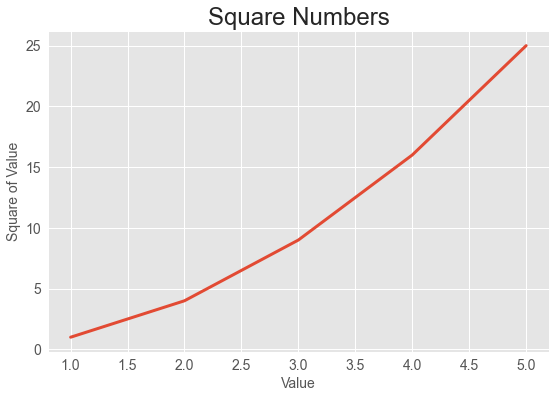

In [18]:
# plotting simple line graph
import matplotlib.pyplot as plt

input_values = [1,2,3,4,5]
squares = [1,4,9,16,25]

plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.plot(input_values, squares, linewidth=3)

# set chart title and label axes
ax.set_title("Square Numbers", fontsize=24)
ax.set_xlabel("Value", fontsize=14)
ax.set_ylabel("Square of Value", fontsize=14)

# set size of itck labels
ax.tick_params(axis='both', labelsize=14)

plt.show()

In [11]:
# plotting simple line graph
import matplotlib.pyplot as plt
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

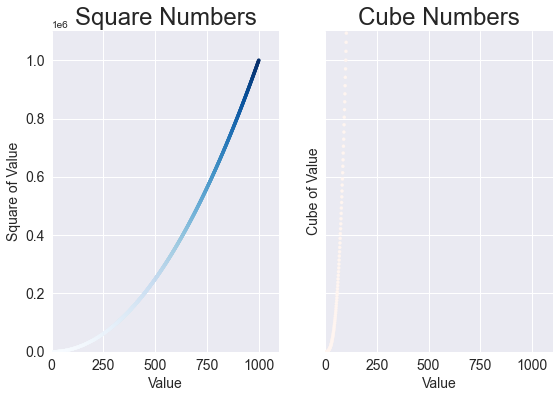

<Figure size 576x396 with 0 Axes>

In [47]:
# plotting simple scatter plot
import matplotlib.pyplot as plt

plt.style.use('seaborn')
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
#ax.scatter(2, 4, s=200)
x_values = range(1,1001) #[i+1 for i in range(5)]
y_values = [j**2 for j in x_values]
cubes = [j**3 for j in x_values]
#ax.scatter(x_values, y_values, c='red', s=10)
#ax.scatter(x_values, y_values, c=(0,0.8,0), s=10)
ax1.scatter(x_values, y_values, c=y_values, cmap=plt.cm.Blues, s=10)
ax2.scatter(x_values, cubes, c=cubes, cmap=plt.cm.Reds, s=10)

# set chart title and label axes
ax1.set_title("Square Numbers", fontsize=24)
ax1.set_xlabel("Value", fontsize=14)
ax1.set_ylabel("Square of Value", fontsize=14)

ax2.set_title("Cube Numbers", fontsize=24)
ax2.set_xlabel("Value", fontsize=14)
ax2.set_ylabel("Cube of Value", fontsize=14)

# set size of itck labels
ax1.tick_params(axis='both', which='major', labelsize=14)

ax2.tick_params(axis='both', which='major', labelsize=14)

# set the range for each axis
ax1.axis([0, 1100, 0, 1100000])

ax2.axis([0, 1100, 0, 1100000])

plt.show()
plt.savefig('squares_plot.png',bbox_inches='tight')

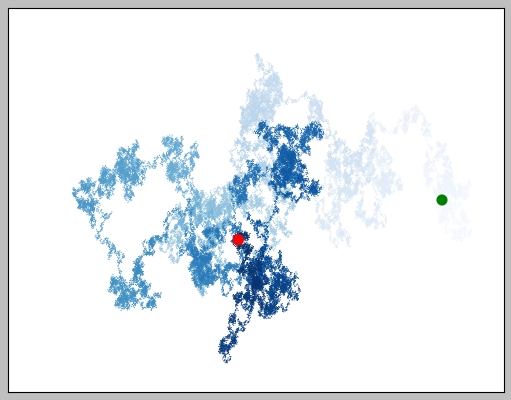

In [7]:
# Plotting random walk defined in random_walk.py
import matplotlib.pyplot as plt

from random_walk import RandomWalk

#while True:
# Make a random walk
rw = RandomWalk(50_000)
rw.fill_walk()

# Plot the points in the walk
plt.style.use('classic')
fig, ax = plt.subplots()
    
point_numbers = range(rw.num_points)
    
#ax.scatter(rw.x_values, rw.y_values, s=15)
ax.scatter(rw.x_values, rw.y_values, c=point_numbers, cmap=plt.cm.Blues, edgecolors='none', s=1)
    
# Emphasize first and last points
ax.scatter(rw.x_values[0], rw.y_values[0], c='green', edgecolors='none', s=100) #since we know the starting point at origin each time
ax.scatter(rw.x_values[-1], rw.y_values[-1], c='red', edgecolors='none', s=100)
    
# Remove the axes
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
    
plt.show()
    
#    keep_running = input("Make another one? (y/n)")
#    if keep_running == 'n':
#        break

# Question: Since random class isnt truly random, and is not secure, can we demonstrate the insecurity visually?

In [16]:
from plotly.graph_objs import Bar, Layout
from plotly import offline

#modified this slightly from book to accept a string input (not validated), automatically generating plot and rolls

# Making the Die
from die import Die

die_to_make = input("What do you want to roll? (input as NdX where N = num of dice, X = num_sides)")
num_die = int(die_to_make[0]) #this tells us the number of die
size = int(die_to_make[2]) #this tells us the size of die

# Create list of die objects
list_of_die = [Die(size) for i in range(num_die)]
#die_1 = Die()
#die_2 = Die(10)

# Make some rolls, and store results in a list
# Use list comprehension instead of long form for loops
#results = [die_1.roll() + die_2.roll() for roll_num in range(50_000)]
results = [sum(die.roll() for die in list_of_die) for roll_num in range(50_000)]
    
# Analyze the results
min_result = num_die #the smallest possible roll value is equal to the number of dice, since all die can roll min 1!
max_result = num_die * size
frequencies = [results.count(value) for value in range(min_result, max_result+1)]
    
#print(results)
#print(frequencies)

# Visualize the results
x_values = list(range(min_result, max_result+1))
data = [Bar(x=x_values, y=frequencies)]

x_axis_config = {'title': 'Result', 'dtick': 1}
y_axis_config = {'title': 'Frequency of Result'}
my_layout = Layout(title = 'Results of rolling 1d6 and 1d10 1000x', xaxis=x_axis_config, yaxis=y_axis_config)
offline.plot({'data': data, 'layout': my_layout}, filename=die_to_make+'.html')

# Activity: Could rework this to request input from user to provide number and type of dice to roll w/ modifiers, ie 2d8+2 and then automatically generate result
# Activity: Could use regex and string validation to accept diff type of die and exclude bad input

What do you want to roll? (input as NdX where N = num of dice, X = num_sides)3d8


'3d8.html'